In [101]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import statsmodels.api as sm

In [84]:
df = pd.read_csv(Path('../Neighborhood/neighborhood_county_tier_final.csv'))
df.head()

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,...,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,Average County House Price,Neighborhood Indicator,Neighborhood Tiers
0,1267.0,Williamstown,MA,Berkshire County,357029.0,23,1347.0,3.782609,1.0,2.0,...,0.0,2.0,5.0,11.0,3.0,1.0,23,357029.0,1.000000,2
1,2134.0,Boston,MA,Suffolk County,620830.0,1,2.0,4.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,584495.0,1.062165,2
2,11702.0,Babylon,NY,Suffolk County,612637.0,34,6364.0,3.926471,31.0,20.0,...,0.0,1.0,10.0,17.0,5.0,1.0,34,584495.0,1.048148,2
3,11703.0,North Babylon,NY,Suffolk County,501250.0,5,708.0,4.200000,4.0,3.0,...,0.0,0.0,1.0,2.0,1.0,1.0,9,584495.0,0.857578,2
4,11704.0,West Babylon,NY,Suffolk County,501198.0,3,231.0,4.000000,3.0,3.0,...,0.0,0.0,1.0,1.0,1.0,0.0,5,584495.0,0.857489,2


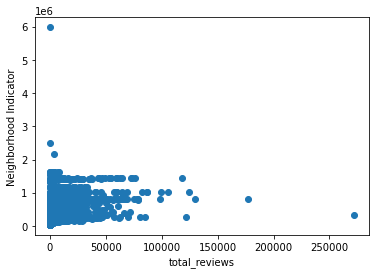

In [85]:
plt.scatter(df.total_reviews, df["Average County House Price"])
plt.xlabel('total_reviews')
plt.ylabel('Neighborhood Indicator')
plt.show()

In [86]:
# Create the features
X = df[['total_restaurants',
 'total_reviews',
 'avg_rating',
 'num_rest_types']]
X.head()

,total_restaurants,total_reviews,avg_rating,num_rest_types
0,23,1347.0,3.782609,23
1,1,2.0,4.500000,0
2,34,6364.0,3.926471,34
3,5,708.0,4.200000,9
4,3,231.0,4.000000,5


In [87]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(13988, 4)

In [88]:
y = df["Neighborhood Indicator"]

In [89]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
#print(f"y_train: {Counter(y_train)}")
#print(f"y_test: {Counter(y_test)}")


In [90]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [91]:
# Create a model with scikit-learn
model = LinearRegression()

In [92]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X_train,y_train)

LinearRegression()

In [93]:
# The model creates predicted y values based on X values
y_pred = model.predict(X_test)
print(y_pred.shape)

(3497,)


In [94]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  0.9032310748843971
Coefficients:


[('total_restaurants', -0.0052533476515846484),
 ('total_reviews', 9.216870820614787e-06),
 ('avg_rating', 0.02859309399463415),
 ('num_rest_types', 0.008321635392788062)]

In [95]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()


,Actual value,Predicted value
10749,1.043211,1.048327
5325,0.923652,1.000732
9498,0.625716,0.963495
1923,2.952315,1.028161
307,1.002908,1.037730


In [96]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 2.71
Mean Absolute Error: 0.3101950911726255
Mean Square Error: 0.23476207672797994
Root Mean Square Error: 0.484522524479492


In [97]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[-5.25334765e-03  9.21687082e-06  2.85930940e-02  8.32163539e-03]
0.9032310748843971


In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



/Users/ramyaramamurthy/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


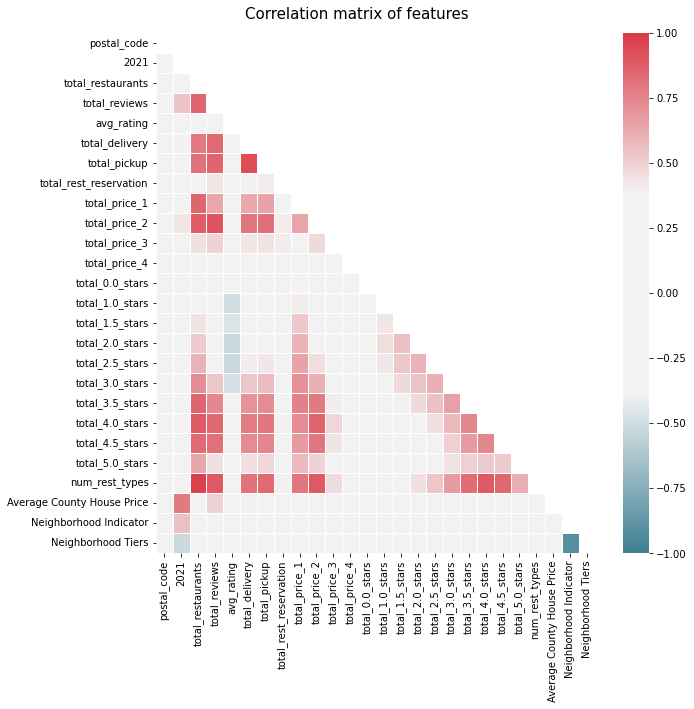

In [99]:
df1 = df[['total_restaurants',
 'total_reviews',
 'avg_rating',
 'num_rest_types', "Average County House Price"]]

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

fig.tight_layout()
#code adapted from https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [106]:
# Ordinary Least Squares
lr = sm.OLS(y_train, X_train).fit()

In [108]:
print(lr.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Neighborhood Indicator   R-squared (uncentered):                   0.812
Model:                                OLS   Adj. R-squared (uncentered):              0.812
Method:                     Least Squares   F-statistic:                          1.134e+04
Date:                    Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                            15:24:12   Log-Likelihood:                         -7965.6
No. Observations:                   10491   AIC:                                  1.594e+04
Df Residuals:                       10487   BIC:                                  1.597e+04
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0